In [4]:
import numpy as np
import zipfile
import os
from keras.preprocessing import image
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Lia - Dogs and cats /dogs-vs-cats.zip'
extract_path = '/content/drive/MyDrive/Lia - Dogs and cats/dogs-vs-cats-extracted/'
# Extrair o zip
with zipfile.ZipFile(path, 'r') as zip_object:
    zip_object.extractall(extract_path)

In [ ]:
path = '/content/drive/MyDrive/Lia - Dogs and cats/dogs-vs-cats-extracted/test1.zip'
extract_test = '/content/drive/MyDrive/Lia - Dogs and cats/dogs-vs-cats-extracted/test-extracted/'
with zipfile.ZipFile(path, 'r') as zip_object:
    zip_object.extractall(extract_path)


KeyboardInterrupt: 

In [7]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7,        # Normaliza valores dos pixels das imagens de 0 a 255 para 0 a 1.
                                         horizontal_flip=True, zoom_range=0.2)                         # Gerador de transformações aleatórias nas imagens
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/drive/MyDrive/Lia - Dogs and cats/dogs-vs-cats-extracted/train',#
                                                               target_size = (64, 64), batch_size = 8,
                                                               class_mode = 'categorical', shuffle = True,)  # Gerador que carrega dados de imagem de um diretório em lotes

network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

# print(network.summary())

network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

historico = network.fit(dataset_treinamento, epochs=30)



Found 300 images belonging to 2 classes.
Epoch 1/30
38/38 [==============================] - 3s 42ms/step - loss: 0.7226 - accuracy: 0.5000
Epoch 2/30
38/38 [==============================] - 2s 43ms/step - loss: 0.6966 - accuracy: 0.4667
Epoch 3/30
38/38 [==============================] - 1s 38ms/step - loss: 0.6920 - accuracy: 0.5267
Epoch 4/30
38/38 [==============================] - 1s 38ms/step - loss: 0.6881 - accuracy: 0.5633
Epoch 5/30
38/38 [==============================] - 1s 37ms/step - loss: 0.6807 - accuracy: 0.5567
Epoch 6/30
38/38 [==============================] - 1s 38ms/step - loss: 0.6814 - accuracy: 0.5467
Epoch 7/30
38/38 [==============================] - 1s 39ms/step - loss: 0.6714 - accuracy: 0.5733
Epoch 8/30
38/38 [==============================] - 2s 42ms/step - loss: 0.6749 - accuracy: 0.5767
Epoch 9/30
38/38 [==============================] - 2s 42ms/step - loss: 0.6714 - accuracy: 0.5833
Epoch 10/30
38/38 [==============================] - 2s 40ms/step - 

1/1 [==============================] - 0s 24ms/step
Previsão: Cachorro


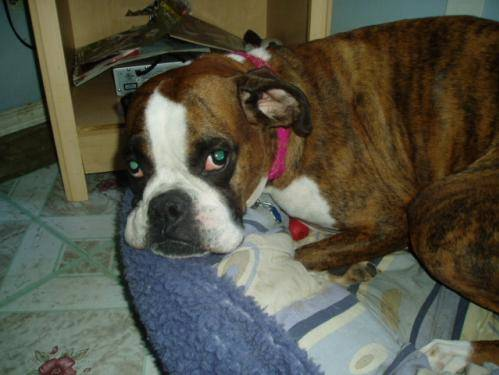

In [29]:
test_image = image.load_img('/content/drive/MyDrive/Lia - Dogs and cats/dogs-vs-cats-extracted/test1/10105.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão
result = network.predict(test_image)

predicted_class = np.argmax(result[0])
class_labels = {0: 'Cachorro', 1: 'Gato'}

prediction = class_labels[predicted_class]
accuracy = round(result[0][predicted_class] * 100, 2)

print("Previsão:", prediction)

DisplayImage(filename='/content/drive/MyDrive/Lia - Dogs and cats/dogs-vs-cats-extracted/test1/10105.jpg')

In [22]:
# Salvando pesos
model_json = network.to_json()

with open('network.json', 'w') as json_file:
    json_file.write(model_json)

network.save('C:\\Users\\Aluno\\Downloads\\Pesos\\modelocatdog.h5')

with open('network.json', 'r') as json_file:
    json_saved_model = json_file.read()

print(json_saved_model)


{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_9_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_9", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null,